In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from ase import Atoms
from ase.io import read
from ase.lattice.cubic import Diamond
from ase.lattice.hexagonal import Graphite

from dscribe.descriptors import SOAP

from soap_package5 import  soap_desc

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
inputfile = "diamond.xyz"
#ref_inputfile = "FINAL_OPT_cooled_1.50_1001.xyz"
atoms = read(inputfile)
#atoms = Diamond("C")

In [5]:
data_vera = []
data_GAP = []
data_dscribe = []
for i in range(1,11):
    desc_vera = soap_desc(atoms,rcut = 1.85,l_max = 1, n_max = i,atom_sigma = 0.5)
    data_vera.append([desc_vera[0],desc_vera[1]])
    desc_gap = Descriptor(f"soap cutoff=1.85, l_max=1, n_max={i}, atom_sigma=0.5")
    gap = desc_gap.calc(atoms)
    data_GAP.append([gap["data"][0][:-1],gap["data"][1][:-1]])
    desc_dscribe = SOAP(species = ['C'],rcut=1.85, nmax=i, lmax=1, sigma=0.5, rbf='polynomial')
    dscribe = desc_dscribe.create(atoms)
    ddata1 = np.sort(dscribe[0]/np.linalg.norm(dscribe[0]))
    ddata2 = np.sort(dscribe[1]/ np.linalg.norm(dscribe[1]))
    data_dscribe.append([ddata1,ddata2])

NameError: name 'Descriptor' is not defined

In [5]:
data_vera = np.abs(data_vera, dtype="object")

/tmp/ipykernel_916876/328887022.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_vera = np.abs(data_vera, dtype="object")


<function matplotlib.pyplot.show(close=None, block=None)>

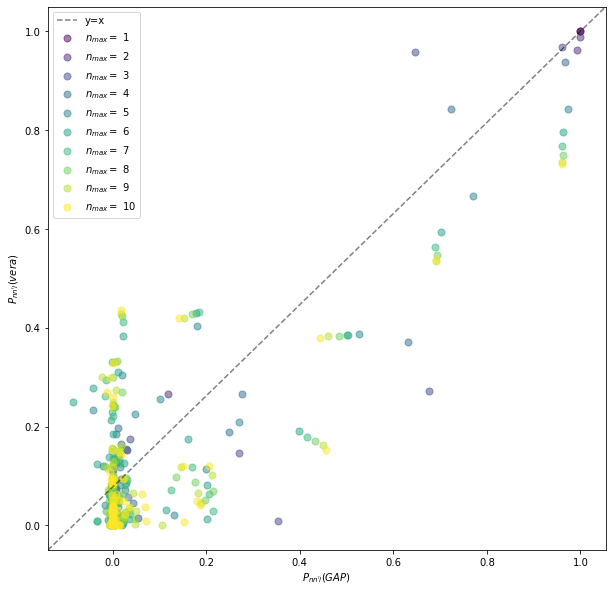

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("$P_{nn'l}(vera)$")
ax.set_xlabel("$P_{nn'l}(GAP)$")

ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

data_label = []
for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.viridis(np.linspace(0, 1, len(data_vera)))
for i in range(len(data_vera)):
    x_data = np.concatenate((data_GAP[i][0],data_GAP[i][1]))
    y_data = np.concatenate((data_vera[i][0],data_vera[i][1]))
    ax.scatter(x_data,y_data, s = 50, marker = "o", color= colors[i], alpha = 0.5,label=data_label[i])

ax.legend()
plt.show

In [6]:
data_dscribe = []
data_gap = []
for i in range(1,11):
    desc_dscribe = SOAP(species = ['C'],rcut=1.85, nmax=i, lmax=1, sigma=0.5, rbf='polynomial')
    dscribe = desc_dscribe.create(atoms)
    ddata1 = np.sort(dscribe[0]/np.linalg.norm(dscribe[0]))
    ddata2 = np.sort(dscribe[1]/ np.linalg.norm(dscribe[1]))
    data_dscribe.append([ddata1,ddata2])
    desc_gap = Descriptor(f"soap cutoff=1.85, l_max=1, n_max={i}, atom_sigma=0.5")
    gap = desc_gap.calc(atoms)
    gdata1 = np.sort(gap["data"][0][:-1])
    gdata2 = np.sort(gap["data"][1][:-1])
    data_gap.append([gdata1,gdata2])

NameError: name 'Descriptor' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

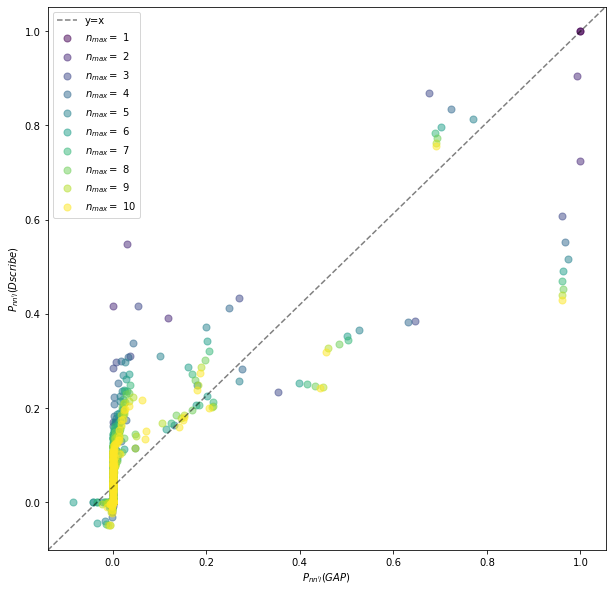

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("$P_{nn'l}(Dscribe)$")
ax.set_xlabel("$P_{nn'l}(GAP)$")

ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

data_label = []
for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.viridis(np.linspace(0, 1, len(data_dscribe)))
for i in range(len(data_gap)):
    x_data = np.concatenate((data_gap[i][0],data_gap[i][1]))
    y_data = np.concatenate((data_dscribe[i][0],data_dscribe[i][1]))
    ax.scatter(x_data,y_data, s = 50, marker = "o", color= colors[i], alpha = 0.5,label=data_label[i])

ax.legend()
plt.show

In [7]:
data_dscribe = []
data_vera = []
for i in range(1,11):
    desc_dscribe = SOAP(species = ['C'],rcut=1.85, nmax=i, lmax=1, sigma=0.5, rbf='polynomial')
    dscribe = desc_dscribe.create(atoms)
    ddata1 = np.sort(dscribe[0]/np.linalg.norm(dscribe[0]))
    ddata2 = np.sort(dscribe[1]/ np.linalg.norm(dscribe[1]))
    data_dscribe.append([ddata1,ddata2])
    desc_vera = soap_desc(atoms,rcut = 1.85,l_max = 1, n_max = i,atom_sigma = 0.5)
    data_vera.append([np.sort(desc_vera[0]),np.sort(desc_vera[1])])

In [8]:
data_vera = np.abs(data_vera, dtype="object")

<ipython-input-8-2d6525255e7a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_vera = np.abs(data_vera, dtype="object")


<function matplotlib.pyplot.show(close=None, block=None)>

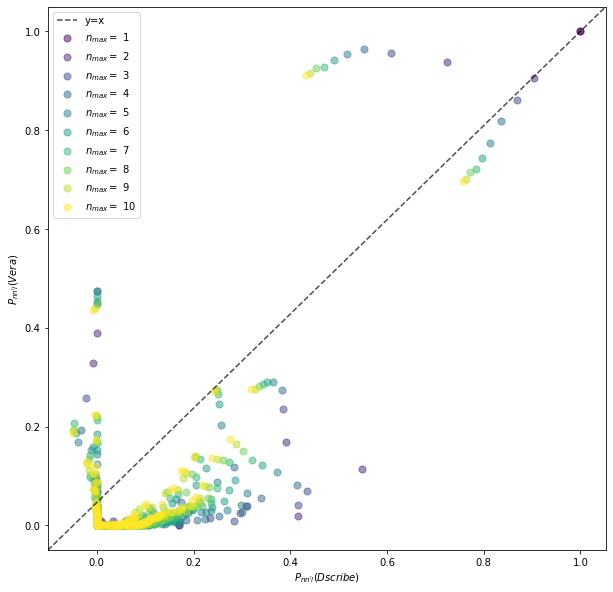

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("$P_{nn'l}(Dscribe)$")
ax.set_ylabel("$P_{nn'l}(Vera)$")

ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.7)

data_label = []
for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.viridis(np.linspace(0, 1, len(data_dscribe)))
for i in range(len(data_vera)):
    y_data = np.concatenate((data_vera[i][0],data_vera[i][1]))
    x_data = np.concatenate((data_dscribe[i][0],data_dscribe[i][1]))
    ax.scatter(x_data,y_data, s = 50, marker = "o", color= colors[i], alpha = 0.5,label=data_label[i])

ax.legend()
plt.show